In [10]:
#pip install tensorflow==2.0.0-rc0
!pip install tensorflow-gpu==2.0.0-rc0
#!sh download_dataset.sh#%% md

# Test regression model

In [11]:
from house_prices_estimation_example_data import *

In [12]:
(trainX,trainX_img, trainY, testX,testX_img,testY), normalizer = load_house_dataset_data(test_size=0.2,random_state=666)
input_shape = trainX.shape[1]


In [13]:
model = generate_simple_regression_model(input_shape)

opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss='mean_squared_error',metrics=['mean_absolute_percentage_error','mean_absolute_error','mean_squared_error'], optimizer=opt)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
layer1 (Dense)               (None, 16)                176       
_________________________________________________________________
layer2 (Dense)               (None, 6)                 102       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 7         
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________


Train on 289 samples, validate on 73 samples
Epoch 1/500
289/289 [==============================] - 1s 3ms/sample - loss: 0.1400 - mean_absolute_percentage_error: 1580609.6250 - mean_absolute_error: 0.3657 - mean_squared_error: 0.1400 - val_loss: 0.1307 - val_mean_absolute_percentage_error: 1560.5989 - val_mean_absolute_error: 0.3535 - val_mean_squared_error: 0.1307
Epoch 2/500
289/289 [==============================] - 0s 347us/sample - loss: 0.1244 - mean_absolute_percentage_error: 1491126.7500 - mean_absolute_error: 0.3431 - mean_squared_error: 0.1244 - val_loss: 0.1145 - val_mean_absolute_percentage_error: 1479.4596 - val_mean_absolute_error: 0.3287 - val_mean_squared_error: 0.1145
Epoch 3/500
289/289 [==============================] - 0s 642us/sample - loss: 0.1080 - mean_absolute_percentage_error: 1421208.0000 - mean_absolute_error: 0.3167 - mean_squared_error: 0.1080 - val_loss: 0.0978 - val_mean_absolute_percentage_error: 1394.1309 - val_mean_absolute_error: 0.3007 - val_mean_s

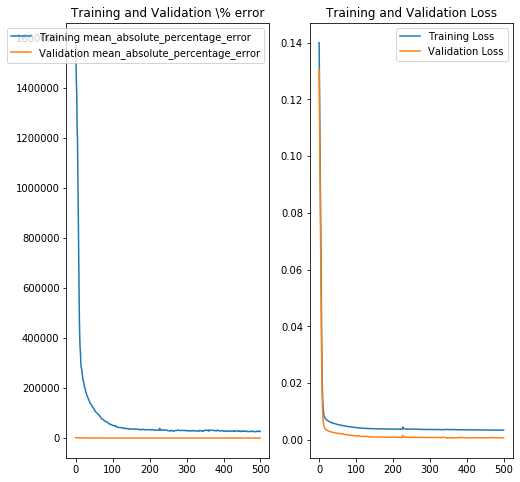

In [14]:

model = train_model(trainX, trainY, testX, testY,model,show_plot=True,epochs=500,batch_size=32)


rms=157713.97, r_value = 0.91, p_value = 0.00, y=0.88*x + 84206.01 


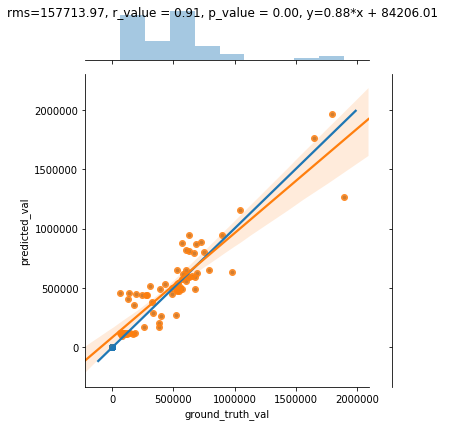

In [15]:
evaluate_regression_model(model,testX,testY,normalizer,show_plot=True)
model.save('regression_model_data.h5')